# Group 19 - NLI (A) - Traditional ML Approach (A) - Evaluate

## Dependency Management

In [1]:
import scipy.sparse
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from joblib import load
from sklearn.metrics import roc_curve, roc_auc_score

## Data Preparation

In [2]:
def build_test_data(test_data, vectorizer):
  test_corpus = [f"{premise} {hypothesis}" for premise, hypothesis in zip(test_data['premise'], test_data['hypothesis'])]

  tfidf_premise = vectorizer.transform(test_data['premise'].values.astype('U'))
  tfidf_hypothesis = vectorizer.transform(test_data['hypothesis'].values.astype('U'))

  test_features = scipy.sparse.hstack((tfidf_premise, tfidf_hypothesis))
  test_labels = test_data['label']

  return test_features, test_labels

## Load Ensemble Model & TF-IDF Vectorizer

Trained Models: https://drive.google.com/drive/folders/1lvrWGcUjme_sG4yvtNi0cQ4TAOil10ce?usp=sharing

In [3]:
ensemble_model= load('models/traditional_ml/ensemble_model.joblib')
vectorizer = load('models/traditional_ml/tfidf/tfidf_vectorizer.joblib')

## Load Test Data & Make Predictions

In [4]:
dev_data = pd.read_csv("./data/dev.csv")

In [5]:
test_features, test_labels = build_test_data(dev_data, vectorizer)
pred_labels = ensemble_model.predict(test_features)

## Classification Metrics

In [6]:
cm = pd.DataFrame(confusion_matrix(test_labels, pred_labels), 
                         index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm)

          Predicted 0  Predicted 1
Actual 0         1778         1481
Actual 1          744         2734


In [7]:
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.70      0.55      0.62      3259
           1       0.65      0.79      0.71      3478

    accuracy                           0.67      6737
   macro avg       0.68      0.67      0.66      6737
weighted avg       0.68      0.67      0.66      6737



In [8]:
scores = cross_val_score(ensemble_model, test_features, test_labels, cv=5)
print("Mean Accuracy: {:.2f}%".format(scores.mean() * 100))

Mean Accuracy: 64.78%


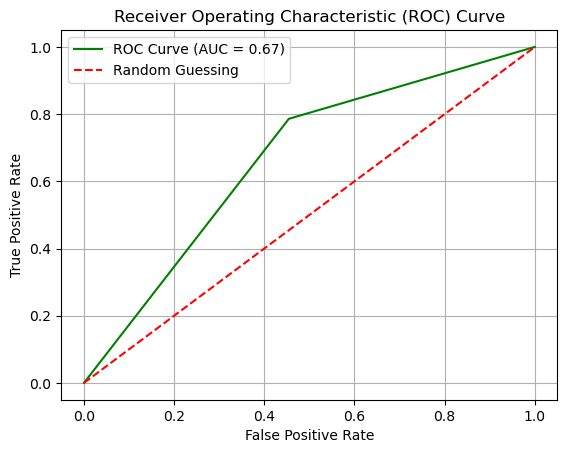

In [9]:
fpr, tpr, _ = roc_curve(test_labels, pred_labels)
auc = roc_auc_score(test_labels, pred_labels)

plt.plot(fpr, tpr, color='green', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()